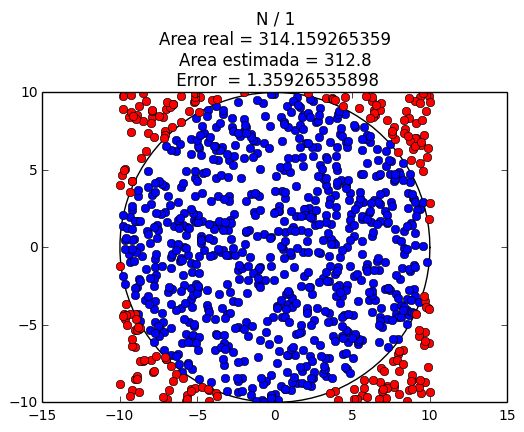

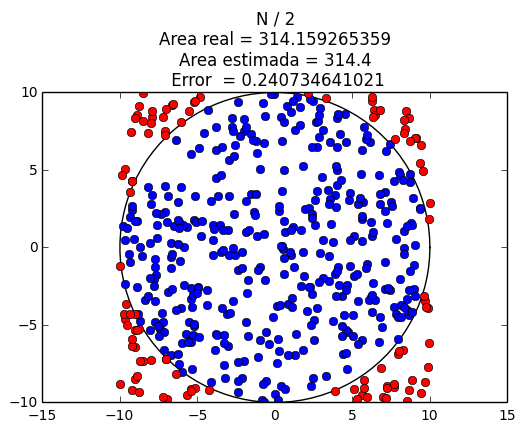

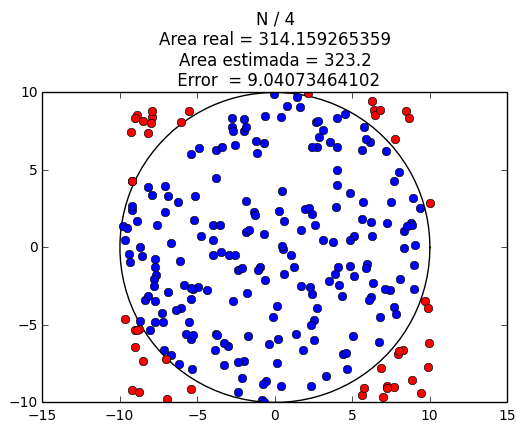

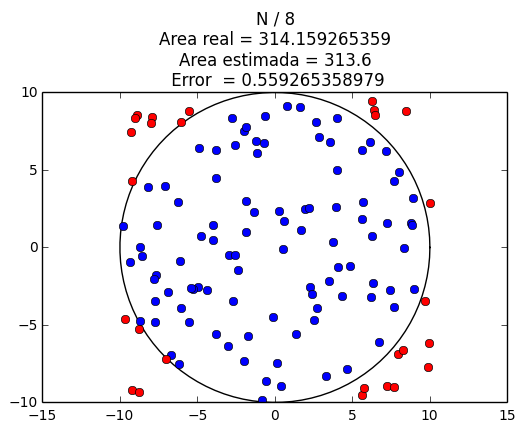

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

def congruencial(a, b, m, x0, n):
    randoms = []
    for i in range(n):
        xn = float((a * x0 + b) % m)
        x0 = xn
        random = float(xn/m)
        randoms.append(random)
    return randoms

def randuX(n):
    return congruencial(170, 1, 30323, 7, n)

def randuY(n):
    return congruencial(172, 1, 30307, 7, n)

def circle_area(r):
    _n = 1000
    for j in range(4):
        n = _n / (2 ** j)
        Ux = randuX(n)
        Uy = randuY(n)
        Cx = []
        Cy = []
        for i in range(n):
            Cx.append(r * (2*Ux[i] - 1))
            Cy.append(r * (2*Uy[i] - 1))

        InX = []
        OutX = []
        InY = []
        OutY = []
        n_inside = 0
        for i in range(n):
            if(r**2 >= (Cx[i]**2 + Cy[i]**2)):
                n_inside = n_inside + 1
                InX.append(Cx[i])
                InY.append(Cy[i])
            else:
                OutX.append(Cx[i])
                OutY.append(Cy[i])

        estimated_area = float(n_inside)/n*((2*r)**2)
        real_area = math.pi*(r**2)
        title = 'N / ' + str(2 ** j) + '\nArea real = ' + str(real_area) + '\nArea estimada = ' + str(estimated_area) + '\n Error  = ' + str(abs(real_area-estimated_area))

        graph(r, InX, OutX, InY, OutY, title)
    
def graph(r, InX, OutX, InY, OutY, title):
    plt.title(title)
    x = np.linspace(0, 2*np.pi, 100)
    plt.plot(r*np.cos(x), r*np.sin(x),'k-')
    plt.axis('equal')
    plt.axis([-r, r, -r, r])
    for i in range(len(InX)):
        plt.plot(InX[i], InY[i], 'o', color='blue')
    for i in range(len(OutX)):
        plt.plot(OutX[i], OutY[i], 'o', color='red')
    plt.show()

circle_area(10)